In [8]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

ncFile=nc.Dataset('/Users/mgrecu/WDomains/Oklahoma/wrfout_d03_2019-05-01_18:00:00')
phb=ncFile.variables['PHB'][-1,:,:,:]
ph=ncFile.variables['PH'][-1,:,:,:]
pb=ncFile.variables['PB'][-1,:,:,:]
p=ncFile.variables['P'][-1,:,:,:]
u=ncFile.variables['U'][-1,:,:,:]
v=ncFile.variables['V'][-1,:,:,:]
w=ncFile.variables['W'][-1,:,:,:]
qr=ncFile.variables['QRAIN'][-1,:,:,:]
qs=ncFile.variables['QSNOW'][-1,:,:,:]
qc=ncFile.variables['QCLOUD'][-1,:,:,:]
qg=ncFile.variables['QGRAUP'][-1,:,:,:]
th=ncFile.variables['T'][-1,:,:,:]

nx1,nx2=125,175
ny1,ny2=100,150

In [14]:
#plt.pcolormesh(qr[0,ny1:ny2,nx1:nx2])
nz_cm1=80
press_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)
th_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)
u_g=np.zeros((nx2-nx1+1,ny2-ny1,nz_cm1),float)
v_g=np.zeros((nx2-nx1,ny2-ny1+1,nz_cm1),float)
w_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1+1),float)
qr_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)
qs_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)
qc_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)
qg_g=np.zeros((nx2-nx1,ny2-ny1,nz_cm1),float)

hint=np.arange(0,nz_cm1,1)*250
for i in range(nx1,nx2):
    for j in range(ny1,ny2):
        h11=(phb[:,j,i]+ph[:,j,i])/9.81-(phb[0,j,i]+ph[0,j,i])/9.81
        h1=(h11[1:]+h11[:-1])/2
        press1=(pb[:,j,i]+p[:,j,i])
        th1=(300+th[:,j,i])
        qr1=(qr[:,j,i])
        qs1=(qs[:,j,i])
        qc1=(qc[:,j,i])
        qg1=(qg[:,j,i])
        qr_g[i-nx1,j-ny1,:]=np.interp(hint,h1,qr1)
        press_g[i-nx1,j-ny1,:]=np.interp(hint,h1,press1)
        th_g[i-nx1,j-ny1,:]=np.interp(hint,h1,th1)
        qs_g[i-nx1,j-ny1,:]=np.interp(hint,h1,qs1)
        qc_g[i-nx1,j-ny1,:]=np.interp(hint,h1,qc1)
        qg_g[i-nx1,j-ny1,:]=np.interp(hint,h1,qg1)
        

for i in range(nx1,nx2+1):
    for j in range(ny1,ny2):
        u1=(u[:,j,i])
        h11=(phb[:,j,i]+ph[:,j,i])/9.81-(phb[0,j,i]+ph[0,j,i])/9.81
        h1=(h11[1:]+h11[:-1])/2
        u_g[i-nx1,j-ny1,:]=np.interp(hint,h1,u1)
        
hintw=np.arange(0,nz_cm1+1,1)*250

for i in range(nx1,nx2):
    for j in range(ny1,ny2+1):
        v1=(v[:,j,i])
        h11=(phb[:,j,i]+ph[:,j,i])/9.81-(phb[0,j,i]+ph[0,j,i])/9.81
        h1=(h11[1:]+h11[:-1])/2
        v_g[i-nx1,j-ny1,:]=np.interp(hint,h1,v1)
        
for i in range(nx1,nx2):
    for j in range(ny1,ny2):
        w1=(w[:,j,i])
        h11=(phb[:,j,i]+ph[:,j,i])/9.81-(phb[0,j,i]+ph[0,j,i])/9.81
        w_g[i-nx1,j-ny1,:]=np.interp(hintw,h11,w1)

import xarray as xr

th_gX=xr.DataArray(th_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])
press_gX=xr.DataArray(press_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])
u_gX=xr.DataArray(u_g,coords=[('x',np.arange(nx1,nx2+1)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x1','y','z'])
v_gX=xr.DataArray(v_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2+1)),('z',np.arange(0,nz_cm1))],dims=['x','y1','z'])
w_gX=xr.DataArray(w_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1+1))],dims=['x','y','z1'])
qr_gX=xr.DataArray(qr_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])
qs_gX=xr.DataArray(qs_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])
qc_gX=xr.DataArray(qc_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])
qg_gX=xr.DataArray(qg_g,coords=[('x',np.arange(nx1,nx2)),('y',np.arange(ny1,ny2)),('z',np.arange(0,nz_cm1))],dims=['x','y','z'])

ds=xr.Dataset({'th_g':th_gX,'press_g':press_gX,'u_g':u_gX,'v_g':v_gX,'w_g':w_gX,'qr_g':qr_gX,'qs_g':qs_gX,'qc_g':qc_gX,'qg_g':qg_gX})
ds.to_netcdf('wrf_MC_regridded.nc',encoding={'th_g':{'zlib':True,'complevel':9},
                                             'press_g':{'zlib':True,'complevel':9},'u_g':{'zlib':True,'complevel':9},
                                             'v_g':{'zlib':True,'complevel':9},'w_g':{'zlib':True,'complevel':9},'qr_g':{'zlib':True,'complevel':9},
                                             'qs_g':{'zlib':True,'complevel':9},'qc_g':{'zlib':True,'complevel':9},'qg_g':{'zlib':True,'complevel':9}})



In [7]:
print(press[0,0,:])

[99538.1171875  96952.57039426 94177.10761473 91483.7542765
 88857.54912883 86294.01562731 83791.1670052  81360.02190692
 78975.5611998  76639.57670799 74354.7572268  72136.21014449
 69974.8567264  67863.68225503 65799.6900132  63779.6074509
 61811.15164515 59892.46039921 58020.74423851 56196.14684312
 54417.58364688 52683.0886101  50996.63514967 49356.09803612
 47755.68103236 46195.81859172 44676.57466515 43197.25785174
 41757.0526747  40356.18656304 38997.36315716 37677.97018681
 36394.50685566 35144.04587419 33926.87399758 32742.45627828
 31590.01811668 30469.25103363 29379.45015298 28319.37687117
 27287.68368311 26283.68378625 25306.86357091 24357.08293187
 23434.03006497 22536.9754795  21665.32318509 20818.06613103
 19994.87778208 19195.823898   18421.39035328 17672.15439561
 16949.1599602  16254.65043034 15592.65791516 14965.41511261
 14369.77225434 13801.36529482 13256.09993835 12730.81306595
 12224.15343886 11735.54029861 11264.18591424 10810.68180043
 10377.18894677  9965.1489

In [56]:
print(phb.max()/9.81,phb.min()/9.81)
f=open('input_sounding','w')
j1=80
i1=90
print("%7.2f %7.2f %7.2f "%((pb[0,j1,i1]+p[0,0,j1,i1])/1e2,300+theta[0,0,j1,i1],qv[0,0,j1,i1]*1e3))
f.write("%7.2f %7.2f %7.2f \n"%((pb[0,j1,i1]+p[0,0,j1,i1])/1e2,300+theta[0,0,j1,i1],qv[0,0,j1,i1]*1e3))
for k in range(0,qv.shape[1]):
    xout=(phb[k:k+2,j1,i1]+ph[0,k:k+2,j1,i1]).mean(axis=0)/9.81,300+theta[0,k,j1,i1],qv[0,k,j1,i1]*1e3,u[k,j1,i1],0.5*v[k,j1,i1]
    print('%8.2f %7.2f %7.3f %7.2f %7.2f' % xout)
    f.write('%8.2f %7.2f %7.3f %7.2f %7.2f \n'%xout)
xout=24689.00,618.20,0.11,xout[3],xout[4]
print(xout)
f.write('%8.2f %7.2f %7.3f %7.2f %7.2f \n'%xout)
f.close()

19898.713047910296 2.8740757466820765
 987.49  297.14   13.87 
  203.94  297.14  13.871   -4.06    0.20
  263.07  297.28  13.835   -4.18    0.22
  338.47  297.46  14.701   -3.77    2.10
  434.22  298.33  15.179   -3.09    4.03
  555.00  299.18  15.249   -2.27    6.22
  705.90  300.00  15.056   -0.86    7.93
  892.34  300.62  14.920    0.70    7.61
 1119.54  301.34  14.000    1.37    6.61
 1392.19  302.47  12.225    1.53    6.33
 1702.97  303.85  10.825    1.47    6.00
 2026.53  305.05   9.709    2.39    5.50
 2346.93  306.29   8.247    4.30    5.19
 2664.47  308.12   6.722    5.67    5.45
 2979.76  310.22   5.610    6.40    6.37
 3292.98  311.81   5.178    7.30    6.49
 3603.77  312.89   4.481    8.45    6.16
 3911.67  313.76   3.340    8.97    5.98
 4216.58  314.67   2.358    8.18    6.24
 4518.74  315.82   1.503    7.53    6.10
 4818.39  316.98   0.798    8.27    5.09
 5115.63  318.04   0.319   10.02    4.30
 5410.50  319.01   0.064   11.84    4.00
 5703.07  319.93   0.027   13.01   

In [54]:
ncFile=nc.Dataset('wrfout_d03_2019-05-02_10:00:00')
phb=ncFile.variables['PHB'][0,:,:,:]
pb=ncFile.variables['PB'][0,:,:,:]
it=0
z=(ph[it,:,:,:]+phb)/(9.81)
ptot=(p[it,:,:,:]+pb)/100
t=(theta[it,:,:,:]+300)*(1000/ptot)**0.286
print(z.shape)

(64, 159, 201)


In [68]:
a=np.nonzero(qr[it,0,:,:]>0.1e-3)
print(len(a[0]))
zsfcL=[]
h_diabL=[]
h1=525+np.arange(50)*250
qrsfcL=[]
dqL=[]
ny,nx=qr[it,0,:,:].shape
xL=[]
for i,j in zip(a[0],a[1]):
    zf=z[:,i,j]
    zm=(zf[1:]+zf[:-1])/2
    zsfcL.append(zm[0])
    h_diabL.append(np.interp(h1,zm,h_diabatic[it,:,i,j]))
    dqL.append(np.interp(h1,zm,qt[it+1,:,i,j]-qt[it,:,i,j]))
    qrsfcL.append(qr[it,0,i,j])
    if i>1 and i<nx-1 and j>1 and j<ny-1:
        
        for k in range(1,60):
            x1=[]
            x1.extend(qr[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qs[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qh[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qg[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qi[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qc[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            x1.extend(qv[it,k-1:k+2,i-1:i+2,j-1:j+2].flatten())
            #x1.append(t[k,i,j])
            #x1.append(ptot[k,i,j])
            xL.append(x1) 
                

2759


In [69]:
print(len(xL))
xL=np.array(xL)
# import standard scaler
from sklearn.preprocessing import StandardScaler
# instantiate
scaler = StandardScaler()
# fit and transform in one step
xL_t = scaler.fit_transform(xL)

133989


In [80]:
# import PCA
from sklearn.decomposition import PCA
# instantiate
pca = PCA(n_components=70)
# fit and transform in one step
xL_pca = pca.fit_transform(xL_t)


In [81]:
print(pca.explained_variance_ratio_.cumsum())

[0.29088909 0.48614891 0.5787731  0.63365285 0.67941613 0.71431544
 0.74428832 0.77004008 0.7951179  0.81288129 0.82773022 0.84149892
 0.85381394 0.86527652 0.87622732 0.88550798 0.89203662 0.89839886
 0.90351674 0.9084708  0.91309988 0.91730699 0.92140342 0.92482056
 0.92815957 0.93135135 0.9344142  0.93731967 0.94008343 0.94273643
 0.94526186 0.94770789 0.95014412 0.95246737 0.95454998 0.95653563
 0.95850541 0.96042561 0.9622154  0.96386916 0.96549699 0.96700121
 0.96836041 0.96968047 0.97092231 0.9721224  0.97328302 0.97441897
 0.97549979 0.97651943 0.97752335 0.97838551 0.97917933 0.97994072
 0.98067822 0.98139162 0.98207241 0.98273641 0.98338049 0.98398234
 0.98454637 0.98509323 0.98559608 0.98609133 0.98653495 0.98697648
 0.98740115 0.98781682 0.98822915 0.98862804]


406.56885
[631, 36, 17]
[129, 1635, 189]
[58, 52, 12]
(2759, 50)
(2759, 50)
[631, 36, 17]
[129, 1635, 189]
[58, 52, 12]


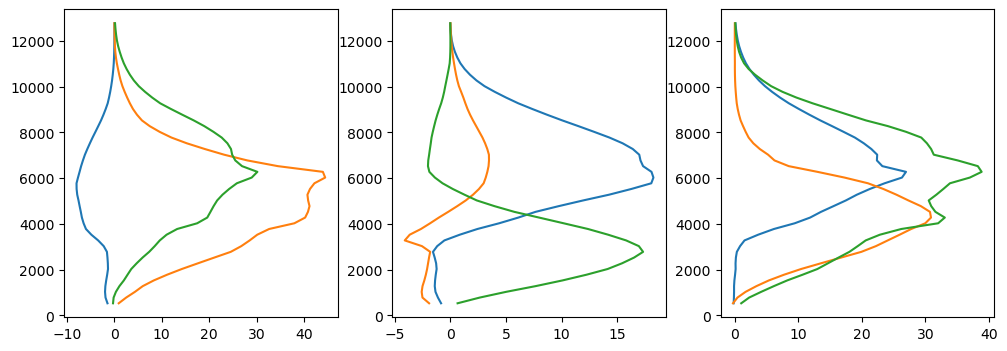

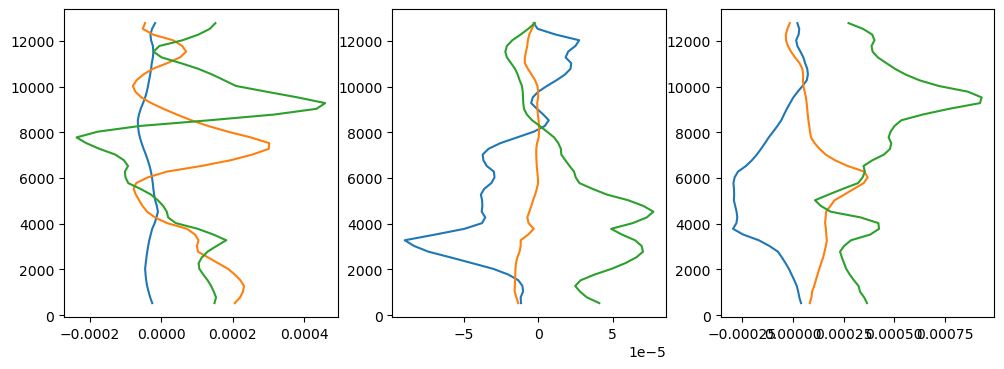

In [50]:
print(np.max(zsfcL))
qrsfcL=np.array(qrsfcL)
dqL=np.array(dqL)
#plt.plot(np.array(h_diabL).mean(axis=0),h1)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=9, random_state=0).fit(np.array(h_diabL))
# plot the cluster centers

plt.figure(figsize=(12,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    xL=[]
    for k in range(3):
        a=np.nonzero(kmeans.labels_==3*i+k)
        plt.plot(kmeans.cluster_centers_[3*i+k,:]/qrsfcL[a].mean(),h1)
        
        xL.append(len(a[0]))
    print(xL)

plt.figure(figsize=(12,4))
h_diabL=np.array(h_diabL)
print(h_diabL.shape)
print(dqL.shape)
for i in range(3):
    plt.subplot(1,3,i+1)
    xL=[]
    for k in range(3):
        a=np.nonzero(kmeans.labels_==3*i+k)
        plt.plot(dqL[a[0],:].mean(axis=0),h1)
        
        xL.append(len(a[0]))
    print(xL)

In [35]:
print(qrsfcL)
print(a)

[0.00011847 0.00022478 0.0001819  ... 0.0002742  0.0004232  0.00010834]
(array([ 10,  11,  11, ..., 153, 154, 155]), array([62, 63, 64, ..., 51, 51, 51]))
